# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.18 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain brains which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: 0.04500000085681677
Total score (averaged over agents) this episode: -0.004999999888241291


### 4. Train the Agent

In [7]:
from maddpg_F import Agent
from collections import deque
import matplotlib.pyplot as plt

import torch

def maddpg(n_episodes=5000, max_t=5000, print_every=10):
    scores_window = deque(maxlen=100)
    scores = []
    beta=1.0
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]          
        states = env_info.vector_observations               
        agent.reset()
        score = np.zeros(2)
        
        for _ in range(max_t):
            actions1 = agent.act(states[0],i_episode)
            actions_opp1=agent.act(states[1],i_episode)
            actions=np.vstack((actions1,actions_opp1))
            actions_opp=np.vstack((actions_opp1,actions1))
            env_info = env.step(actions)[brain_name]           
            next_states = env_info.vector_observations  
            next_states_opp=np.vstack((next_states[1],next_states[0]))
            rewards = env_info.rewards                        
            dones = env_info.local_done                        
            agent.step(states, actions,actions_opp, rewards, next_states,next_states_opp, dones)
                
            states = next_states
            score += rewards
         
            if np.any(dones):
                break 
        max_2_score=np.max(score)
        scores_window.append(max_2_score)
        scores.append(max_2_score)
   
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % print_every == 0:
            print('\rEpisode {}   Average Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window) >= 0.5 and i_episode>=50:
            print('\nEnvironment solved in {:d} episodes!\tAverage100 Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.actor_local.state_dict(), 'actor_checkpoint_F.pth')
            torch.save(agent.critic_local.state_dict(), 'critic_checkpoint_F.pth')
            break
    return scores

Episode 10   Average Score: 0.01
Episode 20   Average Score: 0.01
Episode 30   Average Score: 0.01
Episode 40   Average Score: 0.01
Episode 50   Average Score: 0.01
Episode 60   Average Score: 0.01
Episode 70   Average Score: 0.01
Episode 80   Average Score: 0.01
Episode 90   Average Score: 0.01
Episode 100   Average Score: 0.01
Episode 110   Average Score: 0.01
Episode 120   Average Score: 0.02
Episode 130   Average Score: 0.03
Episode 140   Average Score: 0.03
Episode 150   Average Score: 0.04
Episode 160   Average Score: 0.05
Episode 170   Average Score: 0.06
Episode 180   Average Score: 0.07
Episode 190   Average Score: 0.08
Episode 200   Average Score: 0.08
Episode 210   Average Score: 0.08
Episode 220   Average Score: 0.08
Episode 230   Average Score: 0.09
Episode 240   Average Score: 0.09
Episode 250   Average Score: 0.10
Episode 260   Average Score: 0.13
Episode 270   Average Score: 0.17
Episode 280   Average Score: 0.19
Episode 290   Average Score: 0.22
Episode 300   Average S

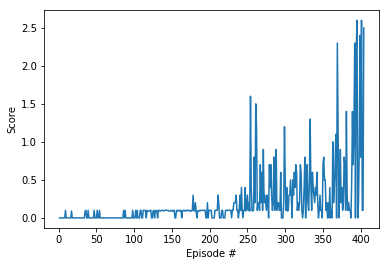

CPU times: user 1h 7min 3s, sys: 2min 16s, total: 1h 9min 19s
Wall time: 1h 10min 21s


In [8]:
%%time
agent = Agent(state_size=state_size, action_size=action_size, random_seed=1)
scores = maddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

## Testing trained agent

In [10]:
agent = Agent(state_size=state_size, action_size=action_size, random_seed=1)
agent.actor_local.load_state_dict(torch.load('actor_checkpoint_F.pth', map_location='cpu'))
agent.critic_local.load_state_dict(torch.load('critic_checkpoint_F.pth', map_location='cpu'))


env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state 
scores = np.zeros(2)                                   # initialize the score 

while True:
    actions = agent.act(states,55)                        # select an action
    env_info = env.step(actions)[brain_name]           
    next_states = env_info.vector_observations         # get next state
    rewards = env_info.rewards                         # get reward 
    
    dones = env_info.local_done                        
    scores += env_info.rewards                         # update the score 
    states = next_states                               
    
    if np.any(dones):                                  
        break
        
print('Total score of this episode: {}'.format(np.mean(scores)))

Total score of this episode: 0.9950000150129199


In [11]:
print(agent.actor_local)

Actor(
  (fc1): Linear(in_features=24, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=2, bias=True)
)


In [12]:
print(agent.critic_local)

Critic(
  (input_norm): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=24, out_features=128, bias=True)
  (fc2): Linear(in_features=132, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=1, bias=True)
)


In [13]:
env.close()